In [96]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import seaborn as sns

In [97]:
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [99]:
bos['MEDV'] = boston.target

In [100]:
bos.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [101]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [102]:
bos.shape

(506, 14)

In [104]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [105]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [106]:
bos.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [108]:
bos.iloc[:,-1].unique()

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 13.6, 19.6, 15.2, 14.5,
       15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 13.2, 13.1, 13.5, 20. ,
       24.7, 30.8, 34.9, 26.6, 25.3, 21.2, 19.3, 14.4, 19.4, 19.7, 20.5,
       25. , 23.4, 35.4, 31.6, 23.3, 18.7, 16. , 22.2, 33. , 23.5, 22. ,
       17.4, 20.9, 24.2, 22.8, 24.1, 21.4, 20.8, 20.3, 28. , 23.9, 24.8,
       22.5, 23.6, 22.6, 20.6, 28.4, 38.7, 43.8, 33.2, 27.5, 26.5, 18.6,
       20.1, 19.5, 19.8, 18.8, 18.5, 18.3, 19.2, 17.3, 15.7, 16.2, 18. ,
       14.3, 23. , 18.1, 17.1, 13.3, 17.8, 14. , 13.4, 11.8, 13.8, 14.6,
       15.4, 21.5, 15.3, 17. , 41.3, 24.3, 27. , 50. , 22.7, 23.8, 22.3,
       19.1, 29.4, 23.2, 24.6, 29.9, 37.2, 39.8, 37.9, 32.5, 26.4, 29.6,
       32. , 29.8, 37. , 30.5, 36.4, 31.1, 29.1, 33.3, 30.3, 34.6, 32.9,
       42.3, 48.5, 24.4, 22.4, 28.1, 23.7, 26.7, 30.1, 44.8, 37.6, 46.7,
       31.5, 31.7, 41.7, 48.3, 29. , 25.1, 17.6, 24

In [112]:
#plt.figure(figsize=(25,10))
#ax = plt.axes()

fig, axs = plt.subplot(1,2, sharey=True)
bos.plot(x='CRIM', y='MEDV', kind='scatter', ax=axs[0], figsize=(15,10))
bos.plot(X='ZN', y='MEDV', kind='scatter', ax=axs[1])

ValueError: Illegal argument(s) to subplot: (1, 2)

<Figure size 432x288 with 0 Axes>

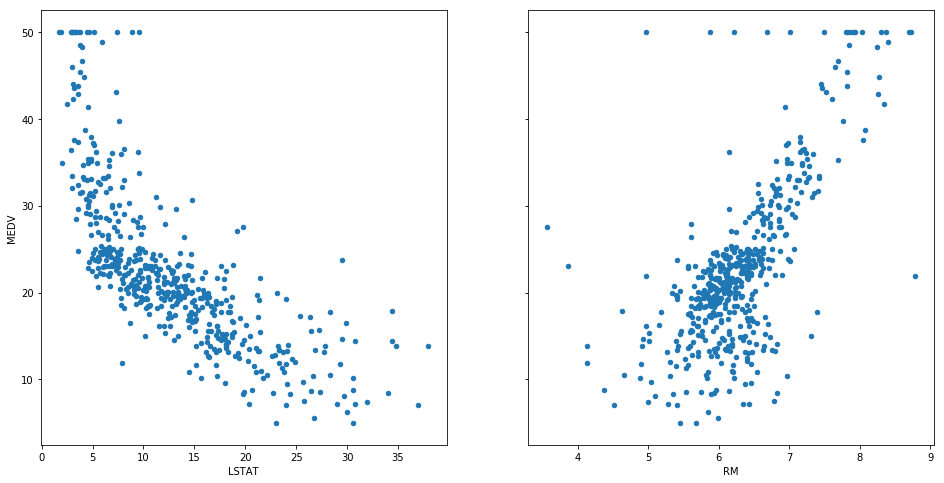

In [120]:
fig, axs = plt.subplots(1, 2, sharey=True)
bos.plot(kind='scatter', x='LSTAT', y='MEDV', ax=axs[0], figsize=(16, 8))
bos.plot(kind='scatter', x='RM', y='MEDV', ax=axs[1])

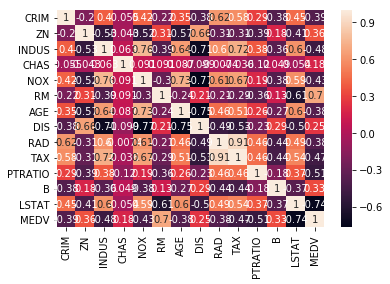

In [117]:
corr_data = bos.corr()
sns.heatmap(corr_data,linecolor='red', annot=True)

In [79]:
sns.pairplot(bos, x_vars=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], y_vars='MEDV', size=40, aspect=0.7)

In [12]:
bos.iloc[:,-1]

0       4.98
1       9.14
2       4.03
3       2.94
4       5.33
5       5.21
6      12.43
7      19.15
8      29.93
9      17.10
10     20.45
11     13.27
12     15.71
13      8.26
14     10.26
15      8.47
16      6.58
17     14.67
18     11.69
19     11.28
20     21.02
21     13.83
22     18.72
23     19.88
24     16.30
25     16.51
26     14.81
27     17.28
28     12.80
29     11.98
       ...  
476    18.68
477    24.91
478    18.03
479    13.11
480    10.74
481     7.74
482     7.01
483    10.42
484    13.34
485    10.58
486    14.98
487    11.45
488    18.06
489    23.97
490    29.68
491    18.07
492    13.35
493    12.01
494    13.59
495    17.60
496    21.14
497    14.10
498    12.92
499    15.10
500    14.33
501     9.67
502     9.08
503     5.64
504     6.48
505     7.88
Name: 12, Length: 506, dtype: float64

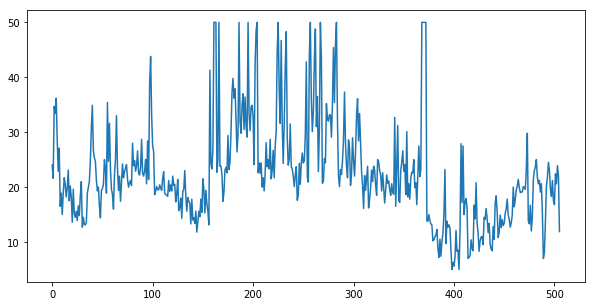

In [80]:
plt.figure(figsize=(10,5))
ax = plt.axes()

ax.plot(bos.iloc[:,-1])

In [81]:
X = bos.iloc[:,:-1]
y = bos.iloc[:,-1]

In [82]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [84]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(379, 13)
(379,)
(127, 13)
(127,)


In [172]:
lm = LinearRegression()

In [173]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [174]:
print(lm.coef_)
print(lm.intercept_)

[-1.27824912e-01  2.95208977e-02  4.92643105e-02  2.77594439e+00
 -1.62801962e+01  4.36089596e+00 -9.19111559e-03 -1.40172019e+00
  2.57458956e-01 -9.94705777e-03 -9.24266403e-01  1.33164215e-02
 -5.18565634e-01]
29.883345627157606


In [123]:
prediction.shape

(127,)

In [125]:
compare = pd.DataFrame(y_test)
compare['prediction'] = prediction

In [127]:
compare.head()

,MEDV,prediction
173,23.6,28.844353
274,32.4,36.015286
491,13.6,15.090498
72,22.8,25.239394
452,16.1,18.870348


In [89]:
prediction = lm.predict(X_test)

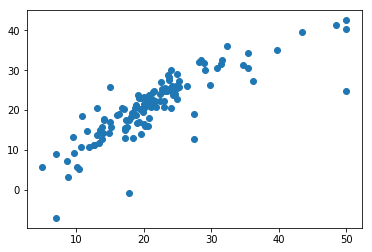

In [94]:
plt.scatter(y_test, prediction)

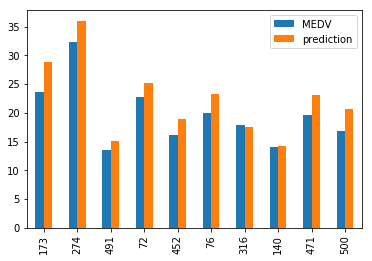

In [129]:
compare.head(10).plot(kind='bar')

In [133]:
from sklearn.metrics import r2_score
from sklearn import metrics

In [142]:
print('MSE: ' +str(metrics.mean_squared_error(y_test,prediction)))
print('MAE: ' +str(metrics.mean_absolute_error(y_test,prediction)))
print('RMSE: ' +str(np.sqrt(metrics.mean_squared_error(y_test,prediction))))
print('R2 Score: ' +str(metrics.r2_score(y_test,prediction)))

MSE: 22.13167789430327
MAE: 3.0649745829380333
RMSE: 4.704431729157441
R2 Score: 0.6839557243179332


In [166]:
import statsmodels.formula.api as smf
lm1 = smf.ols('MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=bos).fit()

In [167]:
lm1.pvalues

Intercept    3.182440e-12
CRIM         1.126402e-03
ZN           7.836070e-04
INDUS        7.345971e-01
CHAS         1.912339e-03
NOX          4.117296e-06
RM           2.207486e-18
AGE          9.546859e-01
DIS          6.017651e-13
RAD          5.189664e-06
TAX          1.117826e-03
PTRATIO      1.268218e-12
B            5.072875e-04
LSTAT        6.595808e-23
dtype: float64

In [168]:
lm1.conf_int()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 30 May 2020   Prob (F-statistic):          6.95e-135
Time:                        12:01:06   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [149]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression

In [150]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=1, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [153]:
alpha = lasscv.alpha_
alpha

0.00035978708150203063

In [155]:
lasso_reg = Lasso(alpha = alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.00035978708150203063, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [156]:
lasso_reg.score(X_test,y_test)

0.6839177851280773

In [157]:
import pickle

In [175]:
pickle.dump(lm, open('model_file.pkl', 'wb'))

In [176]:
loaded_model = pickle.load(open('model_file.pkl', 'rb'))

In [178]:
loaded_model.predict([[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.0900, 1.0, 296.0, 15.3, 396.90, 4.98]])

array([29.98424831])